In [1]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge

import warnings 
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 50)
import os

<a id="section-model"></a>
<h1 style='background:#afd873; border:10; border-radius: 25px; font-size:250%; font-weight: bold; color:black'><center>Airbnb LM Analysis on EU Cities</center></h1>

# IO & Dataset Ingestion

In [6]:
df_list = []
for dirname, _, filenames in os.walk('./data/'):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        df_tmp = pd.read_csv(file_path)
        df_tmp['city'] = filename.split('_')[0]
        df_tmp['period'] = filename.split('_')[-1].replace('.csv', '')
        df_list.append(df_tmp)
        print(filename)
df = pd.concat(df_list, axis=0).drop(['Unnamed: 0'], axis=1).drop_duplicates()

# Data and DDL schema Preview
# Check available columns in the DataFrame
print(f'\n\n Column', df.columns)
print('\nAggregate Table(rows, cols) =',df.shape, '\n\n')
df.describe()
print(f'Airbnb rental units: EU Samples (realSum: Full price in EUR for 2 pers. per 2 nights')
df.sample(5).T


amsterdam_weekdays.csv
amsterdam_weekends.csv
athens_weekdays.csv
athens_weekends.csv
barcelona_weekdays.csv
barcelona_weekends.csv
berlin_weekdays.csv
berlin_weekends.csv
budapest_weekdays.csv
budapest_weekends.csv
lisbon_weekdays.csv
lisbon_weekends.csv
london_weekdays.csv
london_weekends.csv
paris_weekdays.csv
paris_weekends.csv
rome_weekdays.csv
rome_weekends.csv
vienna_weekdays.csv
vienna_weekends.csv


 Column Index(['realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'city', 'period'],
      dtype='object')

Aggregate Table(rows, cols) = (51707, 21) 


Airbnb rental units: EU Samples (realSum: Full price in EUR for 2 pers. per 2 nights


,787,1905,1549,2552,3888
realSum,162.428718,262.941273,139.117357,130.294692,334.323054
room_type,Private room,Private room,Entire home/apt,Private room,Entire home/apt
room_shared,False,False,False,False,False
room_private,True,True,False,True,False
person_capacity,2.0,2.0,2.0,2.0,6.0
host_is_superhost,False,False,False,False,False
multi,0,0,0,0,1
biz,0,1,0,0,0
cleanliness_rating,8.0,10.0,10.0,9.0,9.0
guest_satisfaction_overall,91.0,93.0,99.0,90.0,90.0


# EU Cities Airbnb Ranking: Travellers' Statistics

Table for Average and Median AirBnB pricing in the top 10 European cities:
           Average realSum  Median realSum
city                                      
amsterdam       573.112795      460.244183
athens          151.744121      127.715417
barcelona       293.753706      208.299393
berlin          244.583752      191.175096
budapest        176.513548      152.982093
lisbon          238.210479      225.375235
london          362.469256      261.294950
paris           392.531403      317.597167
rome            205.391950      182.591822
vienna          241.582484      208.494028

City Ranking from Most to Least Satisfying Stay:
city
athens       95.003598
budapest     94.585281
amsterdam    94.514423
berlin       94.323671
vienna       93.731128
rome         93.122300
paris        92.037530
barcelona    91.109072
lisbon       91.093875
london       90.645652
Name: guest_satisfaction_overall, dtype: float64



 City ranking guest_satisfaction_overall for Top 2% Prices (Afluent Cust

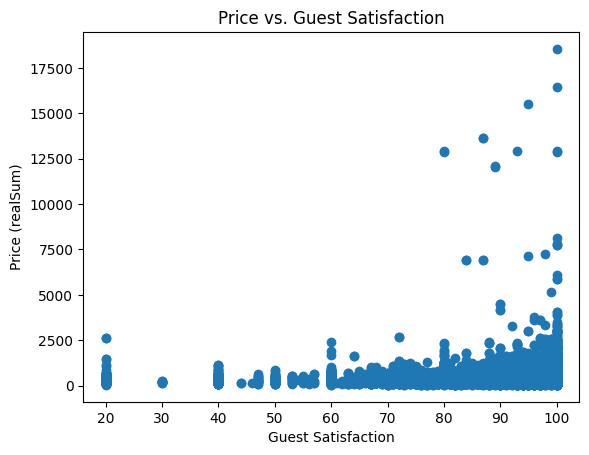

In [7]:
# # Calculate average and median realSum (prices) per city
# avg_realSum_per_city = df.groupby('city')['realSum'].mean()
# median_realSum_per_city = df.groupby('city')['realSum'].median()

# # Sort the Series in descending order based on the values (median realSum)
# sorted_avg_realSum = avg_realSum_per_city.sort_values(ascending=False)
# sorted_median_realSum = median_realSum_per_city.sort_values(ascending=False)

# print("Ranked by Average realSum:")
# print(sorted_avg_realSum)

# print("\nRanked by Median realSum:")
# print(sorted_median_realSum)


#Centralize the above in table
# Average realSum per city (Ranked by Average realSum)
avg_realSum_per_city = df.groupby('city')['realSum'].mean().sort_values(ascending=False)

# Median realSum per city (Ranked by Median realSum)
median_realSum_per_city = df.groupby('city')['realSum'].median().sort_values(ascending=False)

# Combine the two Series into a single DataFrame
pricing_table = pd.DataFrame({
    'Average realSum': avg_realSum_per_city,
    'Median realSum': median_realSum_per_city
})
print("Table for Average and Median AirBnB pricing in the top 10 European cities:")
print(pricing_table)


# Rank cities based on guest satisfaction (highest to lowest)
city_ranking = df.groupby('city')['guest_satisfaction_overall'].mean().sort_values(ascending=False)
print("\nCity Ranking from Most to Least Satisfying Stay:")
print(city_ranking)

# Q: Where are the top vs. bottom 2% customers happier ?
# Who's easy to satisfy, where...? => xCorrelate the mean guest_satisfaction_overall per city for top & bottom price segments
# Ranking most to least satisfying city stay (based on guest_satisfaction_overall vs. realSum percentile for the 
# a) top 2, 5 and 10% prices (afluent customers)
# b) bottom 2, 5 and 10% prices (young customers)

# Outliers: Define the price percentiles for top and bottom prices
top_percentiles = [98] # tested all top 90 to 99.99%
bottom_percentiles = [2] # [0.1, 2, 10]

# Calculate the price thresholds for top and bottom prices
top_price_thresholds = np.percentile(df['realSum'], top_percentiles)
bottom_price_thresholds = np.percentile(df['realSum'], bottom_percentiles)

# Divide the DataFrame into two groups based on price percentiles
top_prices_df = df[df['realSum'] >= top_price_thresholds[-1]]
bottom_prices_df = df[df['realSum'] <= bottom_price_thresholds[0]]

# Calculate the mean guest_satisfaction_overall per city for top prices
top_city_ranking = top_prices_df.groupby('city')['guest_satisfaction_overall'].mean().sort_values(ascending=False)

# Calculate the mean guest_satisfaction_overall per city for bottom prices
bottom_city_ranking = bottom_prices_df.groupby('city')['guest_satisfaction_overall'].mean().sort_values(ascending=False)

# Print the rankings for top and bottom prices
print("\n\n\n City ranking guest_satisfaction_overall for Top 2% Prices (Afluent Customers):")
for i, percentile in enumerate(top_percentiles):
    #print(f"\n Top {100 - percentile}% Prices:")
    print(top_city_ranking.head())
    print()

print("City ranking guest_satisfaction_overall for Bottom 2% Prices (Young / Student):")
for i, percentile in enumerate(bottom_percentiles):
    #print(f"\n Bottom {percentile}% Prices:")
    print(bottom_city_ranking.head())
    print()


# Scatter plot Satisfaction vs. Price segment distrib     
plt.scatter(df['guest_satisfaction_overall'], df['realSum'])
plt.ylabel('Price (realSum)')
plt.xlabel('Guest Satisfaction')
plt.title('Price vs. Guest Satisfaction')
plt.savefig('p0.png')
plt.show()


# Data Quality: Basic Checks

In [8]:
#  Data QC & Preparation (Assuming 'df' contains the dataset with all 21 features)
#  Detecting NaN and Potential Wrong Values
# Check for NaNs and null values in the dataset => no NaNs here :-)
# nan_counts = df.isnull().sum()
# print("\nNaN Counts:")
# print(nan_counts)

# Create a dictionary to store the data quality information for each city
data_quality = {}

# Define the list of cities for comparison
top_cities = ['lisbon', 'paris', 'amsterdam']
bottom_cities = ['barcelona', 'london', 'budapest']

# Iterate through the cities
for city in top_cities + bottom_cities:
    city_data = df[df['city'] == city]
    
    # Check for NaNs and realSum == 0
    n_nans = city_data.isnull().sum().sum()
    n_zeros = (city_data['realSum'] == 0).sum()
    
    # Calculate variance and skewness
    variance = city_data['realSum'].var()
    skewness = city_data['realSum'].skew()
    
    # Identify outliers above and below 1% percentile
    q1 = city_data['realSum'].quantile(0.01)
    q99 = city_data['realSum'].quantile(0.99)
    n_outliers_above = (city_data['realSum'] > q99).sum()
    n_outliers_below = (city_data['realSum'] < q1).sum()
    
    # Store the data quality information in the dictionary
    data_quality[city] = {
        'NaNs': n_nans,
        'realSum == 0': n_zeros,
        'Variance': variance,
        'Skewness': skewness,
        'Outliers Above 1%': n_outliers_above,
        'Outliers Below 1%': n_outliers_below
    }

# Convert the data_quality dictionary to a DataFrame for easier comparison
data_quality_df = pd.DataFrame(data_quality).T

# Display the data quality information
print("Data Quality Comparison for Top Cities:")
print(data_quality_df.loc[top_cities])
print("\nData Quality Comparison for Bottom Cities:")
print(data_quality_df.loc[bottom_cities])


Data Quality Comparison for Top Cities:
           NaNs  realSum == 0       Variance   Skewness  Outliers Above 1%  \
lisbon      0.0           0.0   11875.132008   1.941493               57.0   
paris       0.0           0.0  109527.733639  19.411813               65.0   
amsterdam   0.0           0.0  185466.662501   6.441268               21.0   

           Outliers Below 1%  
lisbon                  55.0  
paris                   54.0  
amsterdam               19.0  

Data Quality Comparison for Bottom Cities:
           NaNs  realSum == 0       Variance   Skewness  Outliers Above 1%  \
barcelona   0.0           0.0  126357.419120  12.422149               29.0   
london      0.0           0.0  222177.671037  16.282307              100.0   
budapest    0.0           0.0   17198.960269  13.376563               41.0   

           Outliers Below 1%  
barcelona               26.0  
london                  98.0  
budapest                40.0  


# Market Study: Satisfaction vs. Price, Distance, Cleanliness and Attractivity per market segment

In [9]:
# Market nano-study: Correlations Guest Satisfaction vs. Price, Distance, Cleanliness and Attractivity per market segments

# Calculate the price thresholds for the top 5%, central +/- sigma, and bottom 5%
price_95th_percentile = df['realSum'].quantile(0.95)
price_5th_percentile = df['realSum'].quantile(0.05)
price_mean = df['realSum'].mean()
price_std = df['realSum'].std()

# Filter the data for the top 5% (afluent)
top_5_percent_data = df[df['realSum'] > price_95th_percentile]

# Filter the data for the central +/- sigma
central_data = df[(df['realSum'] >= price_mean - price_std) & (df['realSum'] <= price_mean + price_std)]

# Filter the data for the bottom 5% (students)
bottom_5_percent_data = df[df['realSum'] < price_5th_percentile]

# Calculate and print the correlation coefficients for each subset
print("Correlation for Top 5% (Afluent):", top_5_percent_data['realSum'].corr(top_5_percent_data['guest_satisfaction_overall']))
print("Correlation for Central +/- Sigma:", central_data['realSum'].corr(central_data['guest_satisfaction_overall']))
print("Correlation for Bottom 5% (Students):", bottom_5_percent_data['realSum'].corr(bottom_5_percent_data['guest_satisfaction_overall']))


# Assuming 'df' contains the dataset with relevant columns, including 'guest_satisfaction_overall' and 'dist'
correlation = df['guest_satisfaction_overall'].corr(df['dist'])
print(f"Correlation between Guest Satisfaction and Distance: {correlation}")

# Assuming 'df' contains the dataset with relevant columns, including 'guest_satisfaction_overall', 'cleanliness_rating', and 'attr_index'
correlation_cleanliness = df['guest_satisfaction_overall'].corr(df['cleanliness_rating'])
correlation_attr_index = df['guest_satisfaction_overall'].corr(df['attr_index'])

print(f"Correlation between Guest Satisfaction and Cleanliness Rating: {correlation_cleanliness}")
print(f"Correlation between Guest Satisfaction and Attractivity Index: {correlation_attr_index}")



Correlation for Top 5% (Afluent): 0.035923454692673766
Correlation for Central +/- Sigma: -0.03728457202202954
Correlation for Bottom 5% (Students): 0.044198024832158074
Correlation between Guest Satisfaction and Distance: -0.004178420362120722
Correlation between Guest Satisfaction and Cleanliness Rating: 0.7140450220820533
Correlation between Guest Satisfaction and Attractivity Index: -0.05062391837660107


# Airbnb Impact Analysis on EU Cities

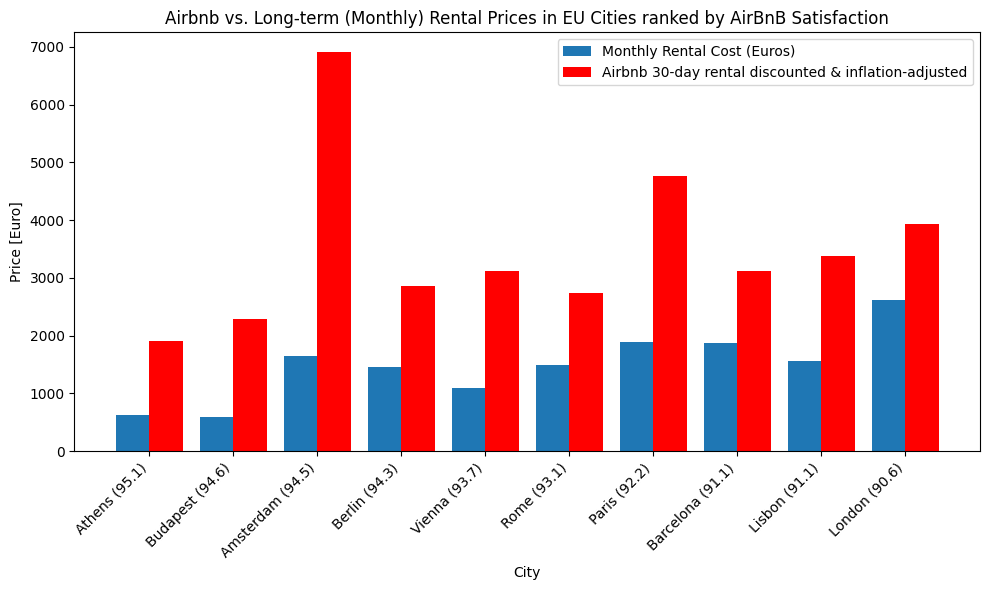

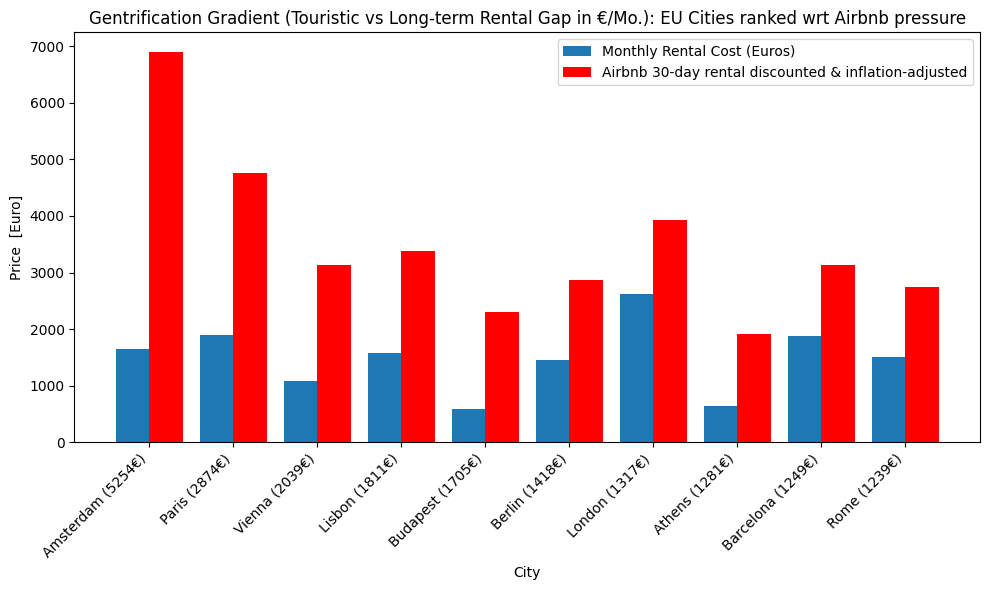

In [10]:
# Gentrification: Airbnb pushing the locals out Data for the plot (1-bdr furnished)
# Rental stats from https://www.statista.com/statistics/1084608/average-rental-cost-apartment-europe-by-city/


# Data for the plot cities ranked from Most to Least Satisfying Stay
cities = ['Athens', 'Budapest', 'Amsterdam', 'Berlin', 'Vienna', 'Rome', 'Paris', 'Barcelona', 'Lisbon', 'London']
monthly_rental_cost = [635, 590, 1650, 1450, 1088, 1500, 1890, 1875, 1570, 2612.50]
median_realSum_scaled = [1915.732253, 2294.731399, 6903.662745, 2867.626439, 3127.410423, 2738.877318, 4763.955005, 3124.490900, 3380.628526, 3929.424249]
city_ranking = [95.1, 94.6, 94.5, 94.3, 93.7, 93.1, 92.2, 91.1, 91.1, 90.6]

# Create an array of positions for the bars
x = np.arange(len(cities))

# Plotting the data
plt.figure(figsize=(10,6))
plt.bar(x,monthly_rental_cost,width=0.4,label='Monthly Rental Cost (Euros)')
plt.bar(x+0.4,median_realSum_scaled,width=0.4,label='Airbnb 30-day rental discounted & inflation-adjusted', color='red')
plt.xticks(x+0.2,[f'{city} ({ranking})' for city,ranking in zip(cities,city_ranking)], rotation=45, ha='right')
plt.xlabel('City')
plt.ylabel('Price [Euro]')
plt.title('Airbnb vs. Long-term (Monthly) Rental Prices in EU Cities ranked by AirBnB Satisfaction')
plt.legend()
plt.tight_layout()
plt.savefig('p1.png')
plt.show()
print("\n\n\n")

# Gentrification Gradient graph: Cities ranked wrt. Airbnb Pressure (touristic vs. long-term rent differential)
cities = ['Athens', 'Budapest', 'Vienna', 'Lisbon', 'Paris', 'Amsterdam', 'London', 'Barcelona', 'Rome', 'Berlin']
monthly_rental_cost = [635, 590, 1088, 1570, 1890, 1650, 2612.50, 1875, 1500, 1450]
median_realSum_scaled = [1915.732253, 2294.731399, 3127.410423, 3380.628526, 4763.955005, 6903.662745, 3929.424249, 3124.490900, 2738.877318, 2867.626439]

# Calculate the delta (difference) between the two values for each city
delta_values = [median - rental for median, rental in zip(median_realSum_scaled, monthly_rental_cost)]

# Sort the cities based on the delta values in descending order (from highest to lowest delta)
sorted_cities = [city for _, city in sorted(zip(delta_values, cities), reverse=True)]
sorted_delta_values = [round(delta) for _, delta in sorted(zip(delta_values, delta_values), reverse=True)]

# Create an array of positions for the bars
x = np.arange(len(cities))

# Plotting the data
plt.figure(figsize=(10,6))
plt.bar(x,[monthly_rental_cost[cities.index(city)] for city in sorted_cities], width=0.4,label='Monthly Rental Cost (Euros)')
plt.bar(x+0.4,[median_realSum_scaled[cities.index(city)] for city in sorted_cities], width=0.4,label='Airbnb 30-day rental discounted & inflation-adjusted', color='red')
plt.xticks(x+0.2,[f'{city} ({delta}€)' for city,delta in zip(sorted_cities,sorted_delta_values)], rotation=45, ha='right')
plt.xlabel('City')
plt.ylabel('Price  [Euro]')
plt.title('Gentrification Gradient (Touristic vs Long-term Rental Gap in €/Mo.): EU Cities ranked wrt Airbnb pressure')
plt.legend()
plt.tight_layout()
plt.savefig('p2.png')
plt.show()


print("\n\n\n")


# Linear Models' Fittings: From Global to Per-City 

In [11]:
# Linear Modelling

#Baseline: Global/EU-wide LM w/ all cities & feats
X_baseline = df[['room_shared', 'room_private', 'person_capacity', 'host_is_superhost',
                 'cleanliness_rating', 'guest_satisfaction_overall',  'bedrooms',
                 'dist', 'metro_dist', 'multi', 'biz', 'lng', 'lat']]  #, 'city', 'period' categoricals
y_baseline = df['realSum']

# Split the data into training and testing sets (60/40 split)
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(
    X_baseline, y_baseline, test_size=0.4, random_state=42)

# Train the baseline Linear Regression model
lm_baseline = LinearRegression()
lm_baseline.fit(X_train_baseline, y_train_baseline)

# Evaluate the baseline model
rmse_baseline = mean_squared_error(y_test_baseline, lm_baseline.predict(X_test_baseline), squared=False)
r2_baseline = r2_score(y_test_baseline, lm_baseline.predict(X_test_baseline))

print("\n\n (1) Baseline: All features LM:")
print(f"RMSE: {round(rmse_baseline, 3)}")
print(f"R-squared (R2): {round(r2_baseline, 3)}")


#=============Per City LM Fit===========================
# List of cities
cities = df['city'].unique()

# Create an empty dictionary to store the R2 and RMSE values for each city
metrics_by_city = {}

# Loop through each city and calculate the R2 and RMSE values
for city in cities:
    # Select data for the current city
    X_city = X_baseline[df['city'] == city]
    y_city = y_baseline[df['city'] == city]
    
    # Split the data into training and testing sets (60/40 split)
    X_train_city, X_test_city, y_train_city, y_test_city = train_test_split(
        X_city, y_city, test_size=0.4, random_state=42)

    # Train the Linear Regression model for the current city
    lm_city = LinearRegression()
    lm_city.fit(X_train_city, y_train_city)

    # Calculate the R2 value for the current city
    r2_city = r2_score(y_test_city, lm_city.predict(X_test_city))
    
    # Calculate the RMSE for the current city
    rmse_city = mean_squared_error(y_test_city, lm_city.predict(X_test_city), squared=False)
    
    # Store the R2 and RMSE values in the dictionary
    metrics_by_city[city] = {'R2': r2_city, 'RMSE': rmse_city}

# Sort the cities based on their R2 values in descending order (from best to worst fit)
sorted_cities = sorted(metrics_by_city.items(), key=lambda x: x[1]['R2'], reverse=True)

# Print the ranked list of cities
print("Ranked list of cities based on price predictability (R-squared and RMSE):\n")
for rank, (city, metrics) in enumerate(sorted_cities, start=1):
    r2_value = round(metrics['R2'], 3)
    rmse_value = round(metrics['RMSE'], 3)
    print(f"{rank}. {city}: R2 = {r2_value}, RMSE = {rmse_value}")

# Try L1 and L2 penalty LM for Lisbon and Vienna
l1_lm = Lasso(alpha=0.1)  # L1 (Lasso) penalty
l2_lm = Ridge(alpha=0.1)  # L2 (Ridge) penalty

# Select data for Lisbon and Vienna
X_lisbon = X_baseline[df['city'] == 'lisbon']
y_lisbon = y_baseline[df['city'] == 'lisbon']

X_vienna = X_baseline[df['city'] == 'vienna']
y_vienna = y_baseline[df['city'] == 'vienna']

# Split the data into training and testing sets (60/40 split) for Lisbon
X_train_lisbon, X_test_lisbon, y_train_lisbon, y_test_lisbon = train_test_split(
    X_lisbon, y_lisbon, test_size=0.4, random_state=42)

# Split the data into training and testing sets (60/40 split) for Vienna
X_train_vienna, X_test_vienna, y_train_vienna, y_test_vienna = train_test_split(
    X_vienna, y_vienna, test_size=0.4, random_state=42)

# Train L1 and L2 penalty models for Lisbon
l1_lm.fit(X_train_lisbon, y_train_lisbon)
l2_lm.fit(X_train_lisbon, y_train_lisbon)

# Evaluate L1 and L2 models for Lisbon
r2_l1_lisbon = r2_score(y_test_lisbon, l1_lm.predict(X_test_lisbon))
rmse_l1_lisbon = mean_squared_error(y_test_lisbon, l1_lm.predict(X_test_lisbon), squared=False)

r2_l2_lisbon = r2_score(y_test_lisbon, l2_lm.predict(X_test_lisbon))
rmse_l2_lisbon = mean_squared_error(y_test_lisbon, l2_lm.predict(X_test_lisbon), squared=False)

# Train L1 and L2 penalty models for Vienna
l1_lm.fit(X_train_vienna, y_train_vienna)
l2_lm.fit(X_train_vienna, y_train_vienna)

# Evaluate L1 and L2 models for Vienna
r2_l1_vienna = r2_score(y_test_vienna, l1_lm.predict(X_test_vienna))
rmse_l1_vienna = mean_squared_error(y_test_vienna, l1_lm.predict(X_test_vienna), squared=False)

r2_l2_vienna = r2_score(y_test_vienna, l2_lm.predict(X_test_vienna))
rmse_l2_vienna = mean_squared_error(y_test_vienna, l2_lm.predict(X_test_vienna), squared=False)

# Print the results for L1 and L2 penalty models for Lisbon and Vienna
print("\nL1 and L2 penalty models for Lisbon:")
print(f"L1 - R2: {round(r2_l1_lisbon, 3)}, RMSE: {round(rmse_l1_lisbon, 3)}")
print(f"L2 - R2: {round(r2_l2_lisbon, 3)}, RMSE: {round(rmse_l2_lisbon, 3)}")

print("\nL1 and L2 penalty models for Vienna:")
print(f"L1 - R2: {round(r2_l1_vienna, 3)}, RMSE: {round(rmse_l1_vienna, 3)}")
print(f"L2 - R2: {round(r2_l2_vienna, 3)}, RMSE: {round(rmse_l2_vienna, 3)}")


#================
#Baseline: Manual naive feat selection
X_baseline = df[['person_capacity', 'bedrooms', 'dist', 'metro_dist', 'attr_index_norm',
                 'guest_satisfaction_overall', 'rest_index_norm']]
y_baseline = df['realSum']

# Split the data into training and testing sets (60/40 split)
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(
    X_baseline, y_baseline, test_size=0.4, random_state=42)

# Train the baseline Linear Regression model
lm_baseline = LinearRegression()
lm_baseline.fit(X_train_baseline, y_train_baseline)

# Evaluate the baseline model
rmse_baseline = mean_squared_error(y_test_baseline, lm_baseline.predict(X_test_baseline), squared=False)
r2_baseline = r2_score(y_test_baseline, lm_baseline.predict(X_test_baseline))

print("\n\n (2) Baseline: Manual feat sel. LM Evaluation:")
print(f"RMSE: {round(rmse_baseline, 3)}")
print(f"R-squared (R2): {round(r2_baseline, 3)}")



 (1) Baseline: All features LM:
RMSE: 350.232
R-squared (R2): 0.156
Ranked list of cities based on price predictability (R-squared and RMSE):

1. lisbon: R2 = 0.488, RMSE = 77.923
2. amsterdam: R2 = 0.398, RMSE = 345.804
3. london: R2 = 0.266, RMSE = 368.272
4. rome: R2 = 0.265, RMSE = 103.167
5. berlin: R2 = 0.261, RMSE = 153.206
6. barcelona: R2 = 0.202, RMSE = 307.495
7. paris: R2 = 0.167, RMSE = 368.186
8. budapest: R2 = 0.085, RMSE = 115.316
9. athens: R2 = 0.014, RMSE = 405.294
10. vienna: R2 = 0.014, RMSE = 498.935

L1 and L2 penalty models for Lisbon:
L1 - R2: 0.485, RMSE: 78.128
L2 - R2: 0.488, RMSE: 77.929

L1 and L2 penalty models for Vienna:
L1 - R2: 0.014, RMSE: 498.918
L2 - R2: 0.014, RMSE: 498.932


 (2) Baseline: Manual feat sel. LM Evaluation:
RMSE: 355.904
R-squared (R2): 0.128


# Feature eng. #1: Log and Standard Scaling for LM

In [12]:
# Log distances: Select relevant features and target variable
X_baseline = df[['room_shared', 'room_private', 'person_capacity', 'host_is_superhost',
                 'cleanliness_rating', 'guest_satisfaction_overall',
                 'bedrooms', 'dist', 'metro_dist', 'multi', 'biz', 'lng', 'lat']]
y_baseline = df['realSum']

# Convert boolean features to numeric representation (0 for False, 1 for True)
bool_features = ['room_shared', 'room_private', 'host_is_superhost', 'multi', 'biz']
X_baseline[bool_features] = X_baseline[bool_features].astype(int)

# Apply logarithmic transformation on 'dist', 'metro_dist'
log_features = ['dist', 'metro_dist']
X_baseline[log_features] = np.log1p(X_baseline[log_features])

# Split the data into training and testing sets (60/40 split)
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(
    X_baseline, y_baseline, test_size=0.4, random_state=42)

# Train the baseline Linear Regression model
lm_baseline = LinearRegression()
lm_baseline.fit(X_train_baseline, y_train_baseline)

# Make predictions on the test data
y_test_pred_baseline = lm_baseline.predict(X_test_baseline)

# Evaluate the baseline model
rmse_baseline = mean_squared_error(y_test_baseline, y_test_pred_baseline, squared=False)
r2_baseline = r2_score(y_test_baseline, y_test_pred_baseline)

print("\n\n (3) LM all feats w/ log(distances) transformation):")
print(f"RMSE: {round(rmse_baseline, 3)}")
print(f"R-squared (R2): {round(r2_baseline, 3)}")



# StdScaler: Select relevant features and target variable
X_baseline = df[['room_shared', 'room_private', 'person_capacity', 'host_is_superhost',
                 'cleanliness_rating', 'guest_satisfaction_overall',
                 'bedrooms', 'dist', 'metro_dist', 'multi', 'biz', 'lng', 'lat']] 
y_baseline = df['realSum']

# Convert boolean features to numeric representation (0 for False, 1 for True)
bool_features = ['room_shared', 'room_private', 'host_is_superhost', 'multi', 'biz']
X_baseline[bool_features] = X_baseline[bool_features].astype(int)

# Split the data into training and testing sets (60/40 split)
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(
    X_baseline, y_baseline, test_size=0.4, random_state=42)

# Select the numerical features to be scaled
numerical_features = ['person_capacity', 'bedrooms', 'dist', 'metro_dist',
                      'cleanliness_rating', 'guest_satisfaction_overall',
                      'lng', 'lat']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical features in the training set
X_train_baseline[numerical_features] = scaler.fit_transform(X_train_baseline[numerical_features])

# Transform the numerical features in the test set
X_test_baseline[numerical_features] = scaler.transform(X_test_baseline[numerical_features])

# Train the baseline Linear Regression model
lm_baseline = LinearRegression()
lm_baseline.fit(X_train_baseline, y_train_baseline)

# Make predictions on the test data
y_test_pred_baseline = lm_baseline.predict(X_test_baseline)

# Evaluate the baseline model
rmse_baseline = mean_squared_error(y_test_baseline, y_test_pred_baseline, squared=False)
r2_baseline = r2_score(y_test_baseline, y_test_pred_baseline)

print("\n\n (4) LM w/ StdScaled features:")
print(f"RMSE: {round(rmse_baseline, 3)}")
print(f"R-squared (R2): {round(r2_baseline, 3)}")

# Print the statistics for each feature in the dataset
#print("\n Statistics for each feature:")
#print(df.describe())




 (3) LM all feats w/ log(distances) transformation):
RMSE: 350.463
R-squared (R2): 0.155


 (4) LM w/ StdScaled features:
RMSE: 350.232
R-squared (R2): 0.156


# Feature eng. #2: Clipping for Outlier Control




(5) Outlier Impact on R2 and RSME


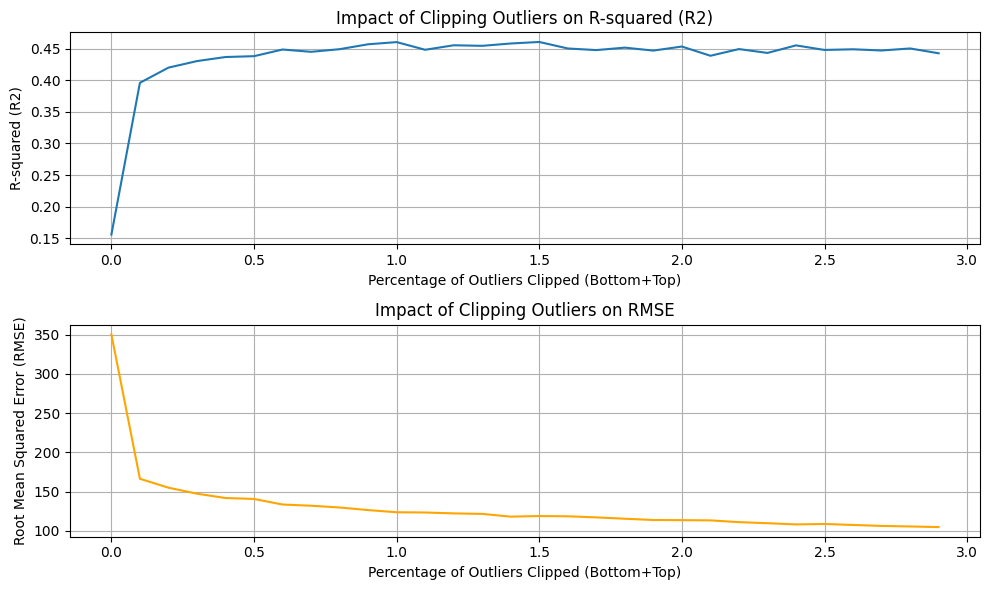

In [13]:

# ===================Outlier Clipping Plots for visual optimisation ====================
## Define the clipping percentages for both top and bottom outliers
bottom_percentages = np.arange(0.0, 3., 0.1).tolist()
top_percentages = np.arange(100., 97., -0.1).tolist()

# Initialize lists to store the RMSE and R2 values for each clipping scenario
rmse_values = []
r2_values = []

# Loop through the clipping percentages
for bottom, top in zip(bottom_percentages, top_percentages):
    # Calculate the clipping threshold for bottom and top
    bottom_threshold = np.percentile(y_baseline, bottom)
    top_threshold = np.percentile(y_baseline, top)
    
    # Clip the outliers
    clipped_indices = (y_baseline >= bottom_threshold) & (y_baseline <= top_threshold)
    X_clipped = X_baseline[clipped_indices]
    y_clipped = y_baseline[clipped_indices]
    
    # Split the data into training and testing sets (60/40 split)
    X_train_clipped, X_test_clipped, y_train_clipped, y_test_clipped = train_test_split(
        X_clipped, y_clipped, test_size=0.4, random_state=42)

    # Train the baseline Linear Regression model
    lm_clipped = LinearRegression()
    lm_clipped.fit(X_train_clipped, y_train_clipped)

    # Make predictions on the test data
    y_test_pred_clipped = lm_clipped.predict(X_test_clipped)

    # Evaluate the model
    rmse_clipped = mean_squared_error(y_test_clipped, y_test_pred_clipped, squared=False)
    r2_clipped = r2_score(y_test_clipped, y_test_pred_clipped)
    
    # Append RMSE and R2 values to the lists
    rmse_values.append(rmse_clipped)
    r2_values.append(r2_clipped)

# Plotting the results
print('\n\n\n(5) Outlier Impact on R2 and RSME')
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(bottom_percentages, r2_values, label='R2')
plt.xlabel('Percentage of Outliers Clipped (Bottom+Top)')
plt.ylabel('R-squared (R2)')
plt.title('Impact of Clipping Outliers on R-squared (R2)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(bottom_percentages, rmse_values, label='RMSE', color='orange')
plt.xlabel('Percentage of Outliers Clipped (Bottom+Top)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Impact of Clipping Outliers on RMSE')
plt.grid(True)

plt.tight_layout()
plt.savefig('p3.png')
plt.show()



# Feature eng. #3: Refit LM with optimal (min.) clipping

In [14]:
# Best LR model across all cities
# Price outlier removal w/ Fixed percentile: Clipping the realSum Outlier Rows
# Use the prior plots to visually detect the max of F1-LM = 2*R + RSME
# Calculate the bottom and top X percentiles of the target variable 'realSum'

price_percentile_lo = np.percentile(df['realSum'], 0.6)
price_percentile_hi = np.percentile(df['realSum'], 99.4)

# Clip outlier rows based on the percentiles
df_clipped = df[(df['realSum'] >= price_percentile_lo) & (df['realSum'] <= price_percentile_hi)]

# Variance: Check for outliers deviating more than 95% from the column mean
# column_means = df_clipped.mean()
# outliers = ((df_clipped - column_means).abs() > 0.95 * column_means).sum()
# print("\nOutliers (deviating more than 95% from column mean):")
# print(outliers)
# print('\n\n')

# Reassign the clipped features and target variable
X_clipped = df_clipped[['room_shared', 'room_private', 'person_capacity', 'host_is_superhost',
                        'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall',
                        'bedrooms', 'dist', 'metro_dist', 'lng', 'lat']]
y_clipped = df_clipped['realSum']

# Convert boolean features to numeric representation (0 for False, 1 for True)
X_clipped[bool_features] = X_clipped[bool_features].astype(int)

# Split the clipped data into training and testing sets (60/40 split)
X_train_clipped, X_test_clipped, y_train_clipped, y_test_clipped = train_test_split(
    X_clipped, y_clipped, test_size=0.4, random_state=42)

# Train the Linear Regression model on the clipped training data
lm_clipped = LinearRegression()
lm_clipped.fit(X_train_clipped, y_train_clipped)

# Make predictions on the test data using the clipped model
y_test_pred_clipped = lm_clipped.predict(X_test_clipped)

# Evaluate the clipped model
rmse_clipped = mean_squared_error(y_test_clipped, y_test_pred_clipped, squared=False)
r2_clipped = r2_score(y_test_clipped, y_test_pred_clipped)

# Calculate the number of rows dropped after clipping
num_rows_dropped = len(df) - len(df_clipped)

print(f"\n\nNumber of rows dropped after 0.6% outlier clipping: {num_rows_dropped}")
print("(6) LM with clipped 0.6% outliers:")
print(f"RMSE: {rmse_clipped:.3f}")
print(f"R-squared (R2): {r2_clipped:.3f}")

print("\n\n")



Number of rows dropped after 0.6% outlier clipping: 620
(6) LM with clipped 0.6% outliers:
RMSE: 133.631
R-squared (R2): 0.449





<a id="section-model"></a>
<h1 style='background:#afd873; border:10; border-radius: 25px; font-size:250%; font-weight: bold; color:black'><center>End.</center></h1>

In [15]:
# Part 2 (preliminary): Re-binning of key features

# select main label
main_label = 'realSum'
# log10-transform main label
df[main_label] = df[main_label].apply(lambda x: np.log10(x))
# bin distances on larger bins
df['dist'] = df['dist'].apply(lambda x: 1/2*round(2*x))
df['metro_dist'] = df['metro_dist'].apply(lambda x: 1/2*round(2*x))
# bin guest_satisfaction_overall rating on larger bins
df['guest_satisfaction_overall'] = df['guest_satisfaction_overall'].apply(lambda x: 5*round(1/5*x))
# finally, drop unused columns
cols2drop = ['attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'room_shared', 'room_private', 'lng', 'lat']
df = df.drop(cols2drop, axis=1)
print(df.shape)
df.sample(5).T

(51707, 13)


,1616,66,1247,1945,563
realSum,2.555183,2.359633,2.386596,1.933352,2.95767
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Private room,Entire home/apt
person_capacity,2.0,4.0,4.0,3.0,4.0
host_is_superhost,False,False,False,False,True
multi,0,0,0,1,0
biz,0,0,0,0,0
cleanliness_rating,9.0,9.0,10.0,10.0,10.0
guest_satisfaction_overall,90,95,95,95,100
bedrooms,1,0,1,2,2
dist,3.0,0.5,4.0,3.0,2.5


In [16]:
df.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000
mean,2.353667,3.161661,0.291353,0.350204,9.390624,92.717620,1.15876,3.191899,0.678399
std,0.259100,1.298545,0.454390,0.477038,0.954868,9.071952,0.62741,2.399200,0.878741
min,1.541321,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.000000,0.000000
25%,2.172463,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.500000,0.000000
50%,2.324988,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.500000,0.500000
75%,2.504735,4.000000,1.000000,1.000000,10.000000,100.000000,1.00000,4.500000,0.500000
max,4.268237,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.500000,14.500000


In [17]:
df.isnull().sum().sum()

0